## MTH786P Machine Learning with Python
#### Work by : Sujin Sundar Jegadheesan Kannan
#### Student number : 230252424

### Final Project
### Chosen Dataset : Credit Card

______________________________________________________________________

### First Approach (using coursework)

### Steps
#### 1 . Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2 . Methods definition

As the target variable in our credit card dataset is the column 'rejected' which states whether the applicant's credit card is approved or not
Hence we are gonna proceed with basic single target variable prediction binary logistic regression

Creating necessary methods for binary logistic regression
We already predefined required methods from courseworks (titanic dataset)
Hence using the same for solving the current credit card dataset

### 2a. Data standardisation 
In real-world problems we usually get a raw data in the form of $s$ samples each of which is described by numeric several values corresponding to different characteristics of the object. Such a data could be highly non-uniform. The goal of applying $\textit{standardisation}$ is to make sure different features of objects are on almost on the same scale so that each feature is equally important and make it easier to process by most ML algorithms. The result of standardisation is that the features will be rescaled to ensure the mean and the standard deviation to be $0$ and $1$, respectively. This means that for a data given by $\mathbf{X} = \left(
\left(\mathbf{x}^{(1)}\right)^{\top},\left(\mathbf{x}^{(2)}\right)^{\top},\ldots,\left(\mathbf{x}^{(s)}\right)^{\top}
\right) \in \mathbb{R}^{s\times d}$ we define a new, rescaled data as:
$$
\hat{\mathbf{x}}^{(i)}_k = \frac{\mathbf{x}^{(i)}_k - \left\langle \mathbf{x}_k \right\rangle }{\left(\sigma_{\mathbf{x}}\right)_k},
$$
where $\left\langle \mathbf{x}_k \right\rangle = \frac{1}{s}\sum\limits_{j=1}^s \mathbf{x}^{(j)}_k$, and
$\left(\sigma_\mathbf{x}\right)_k = \sqrt{
	\frac{1}{s}\sum\limits_{j=1}^s \left(\mathbf{x}^{(j)}_k-\left\langle \mathbf{x}_k \right\rangle\right)^2}$
are the mean and standard deviation of data vector $\mathbf{x}$.  

Write two functions 
1. **standardise** to standardise the columns of a multi-dimensional array. The function **standardise**	takes the multi-dimensional array *data_matrix* as its input argument. It subtracts the means from each column and divides by the standard deviations. It returns the *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations*.
2. **de_standardise** to de-standardise the columns of a multi-dimensional array. The function **de_standardise** reverses the above operation. It takes a *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations* as its arguments and returns a matrix for which the standardisation process is reversed.

### 2b. Linear regression data
Function $\mathtt{linear\_regression\_data}$ outputs the linear regression data matrix defined as
$$
\mathbf{\Phi\left(X\right)} = 
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}
$$
Here, *data_inputs* is supposed to be a data matrix containing all inputs in the matrix form as follows
$$
\mathbf{X} = 
\begin{pmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \ddots & \vdots & \\
x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}.
$$
The function should output data matrix $\mathbf{\Phi\left(X\right)}$.

### 2c. Model Function
Function $\mathtt{model\_function}$ that takes two arguments _data_matrix_ and _weights_ and outputs the values of the model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ 

### 2d. Logistic Function
Function $\mathtt{logistic\_function}$ takes an argument named *inputs* and returns the output of the $\sigma(x)$ sigmoid function, i.e.
\begin{equation*} 
\sigma(x): = \frac{1}{1+\mathrm{e}^{-x}} \, , 
\end{equation*}
applied to the *input*. Here $x$ is the mathematical notation for the argument inputs.

### 2e. Gradient Descent
Function $\mathtt{gradient\_descent}$ performs gradient descent to numerically approximate a minimiser of a convex function. The function should take the following arguments
- *objective* - a lambda-function representing function $E$. This itself should take a NumPy array as its argument and return a real number.
- *gradient* - a lambda-function representing function $\nabla E$. This itself should take a NumPy array as its argument and return a NumPy array representation of the gradient $\nabla E$.
- *initial_ weights* - a NumPy array with initial values $\mathbf{w}^{(0)}$ for the first iterate 
- *step_size* - a step-size parameter $\tau$ for the gradient descent step
- *no_of_iterations* - an integer parameter that controls the number of iterations
- *print_output* - an integer parameter that controls how often you are printing an intermediate result. If say *print_output = 100*, then after every 100th iteration you are asked to print your current iterate and a value of the objective as *Iteration k/m, objective = o.*, where $k$ is a number of current iteration, $m$ is a total number of iterations, and $o$ is a value of the objective evaluated at current iterate.


### 2f. Binary logistic regression cost , gradient functions
The cost function for binary logistic regression as well as its gradien is defined below. 
$$
\mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \log\left[1+\exp\left(f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right)\right] - y_i\cdot f\left(\mathbf{x}^{(i)},\mathbf{w}\right)
\right),
$$
where $\mathbf{x}^{(i)}$ is a vector representing $i$-th data sample and $f$ is a model function. In the case of linear model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ one has
$$
\nabla \mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \phi\left(\mathbf{x}^{(i)}\right)\cdot\sigma
\left(\left\langle \phi\left(\mathbf{x}^{(i)}\right),\mathbf{w} \right\rangle \right) - y_i\cdot \phi\left(\mathbf{x}^{(i)}\right)
\right),
$$
with $\phi\left(\mathbf{x}^{(i)}\right)$ being an augmented $i$-th data vector containing additional coordinate $1$.

The cost function is defined as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and should take the NumPy arrays _data_matrix_, _data_labels_ and _weights_ as arguments. Subsequently, write a method $\mathtt{binary\_logistic\_regression\_gradient}$ that takes the same inputs as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and computes the gradient of the binary logistic regression cost function.

### 2g. Classification accuracy and Prediction Function
The above 2 functions helps us the find out the prediction count which our model has given and its percentage comparing to the actual target variables

In [2]:
# methods

def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels 
    # this returns an array made of true and false 
    return np.mean(equal_labels)

def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means

def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

def model_function(data_matrix, weights):
    return data_matrix @ weights

def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

def binary_prediction_function(data_matrix, weights):
    # the binary classification can be obtained by applying the logistic function to the predicted ys i.e., Xw
    # in this first implementation we use classic regression first then use the logistic function later
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 1/2

def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):
    
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1,m=no_of_iterations, 
                                                               o=objective_values[counter]))
            
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1,
                                                                       m=no_of_iterations, 
                                                                       o=objective_values[counter]))
    return weights, objective_values

def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)

def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

### 3. Importing our dataset

In [3]:
cc_dataset_path = 'credit_card_dataset.csv'


### 3.1 Visualising dataset

In [4]:
cc_data = pd.read_csv("credit_card_dataset.csv")
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  Rejected         1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [5]:
cc_data.head(n=10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,NaN,4,0
5,5009053,F,N,Y,2,202500.0,Working,Higher education,Married,House / apartment,-10997.0,-2289,Core staff,4,0
6,5009074,F,Y,Y,1,450000.0,State servant,Higher education,Married,House / apartment,-17726.0,-708,Core staff,3,0
7,5009118,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737.0,-432,NaN,1,0
8,5009146,M,Y,N,0,315000.0,Working,Higher education,Married,House / apartment,-15825.0,-3720,Managers,2,0
9,5009195,F,N,N,0,292500.0,State servant,Secondary / secondary special,Married,House / apartment,-20953.0,-8684,Accountants,2,0


In [6]:
cc_data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Rejected
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


### 3.2 Checking for any null values (NAN)

In [7]:
cc_data.isna().any()

Ind_ID             False
GENDER              True
Car_Owner          False
Propert_Owner      False
CHILDREN           False
Annual_income       True
Type_Income        False
EDUCATION          False
Marital_status     False
Housing_type       False
Birthday_count      True
Employed_days      False
Type_Occupation     True
Family_Members     False
Rejected           False
dtype: bool

### 3.2 Displaying all categorical variables

In [8]:
print("Unique genders")
print(cc_data['GENDER'].unique())
print("Unique Housing types")
print(cc_data['Housing_type'].unique())
print("Unique income types")
print(cc_data['Type_Income'].unique())
print("Unique occupation types")
print(cc_data['Type_Occupation'].unique())
print("Unique education types")
print(cc_data['EDUCATION'].unique())
print("Unique Marital status")
print(cc_data['Marital_status'].unique())

Unique genders
['M' 'F' nan]
Unique Housing types
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique income types
['Pensioner' 'Working' 'Commercial associate' 'State servant']
Unique occupation types
[nan 'Laborers' 'Core staff' 'Drivers' 'Managers' 'Accountants'
 'Cleaning staff' 'Sales staff' 'Cooking staff' 'Security staff'
 'Medicine staff' 'Secretaries' 'High skill tech staff' 'HR staff'
 'Private service staff' 'Low-skill Laborers' 'Realty agents' 'IT staff'
 'Waiters/barmen staff']
Unique education types
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique Marital status
['Married' 'Separated' 'Civil marriage' 'Single / not married' 'Widow']


### 4. Defining target and features (output and inputs)

Using genfrom text method of numpy library to get the desired features and targets and breaking them if they are categorical

In [9]:
# Load gender data
sex = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[1], dtype='str')
sex = np.where(sex == 'M', 0, 1)

# Load car data
car = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[2], dtype='str')
car = np.where(car == 'N', 0, 1)

# Load property data
property = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[3], dtype='str')
property = np.where(property == 'N', 0, 1)

# Load property data
property = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[3], dtype='str')
property = np.where(property == 'N', 0, 1)

# Load children data
children = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[4], dtype='int')

# Load annual income data
annual_income = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[5], dtype='int')

# Load Type income data
type_income = np.genfromtxt(cc_dataset_path, delimiter=",",skip_header=1, usecols=[6], dtype = None, encoding=None)
type_income_Commercial_Associate = np.where(type_income == 'Commercial associate',1,0).astype(int)
type_income_Pensioner = np.where(type_income == 'Pensioner',1,0).astype(int)
type_income_Working = np.where(type_income == 'Working',1,0).astype(int)
type_income_State_Servant = np.where(type_income == 'State servant',1,0).astype(int)

# Load Education data
education = np.genfromtxt(cc_dataset_path, delimiter=",",skip_header=1, usecols=[7], dtype = None, encoding=None)
education_Academic = np.where(education == 'Academic degree',1,0).astype(int)
education_Higher = np.where(education == 'Higher education',1,0).astype(int)
education_Secondary = np.where(education == 'Secondary / secondary special',1,0).astype(int)
education_Incomplete = np.where(education == 'Incomplete higher',1,0).astype(int)
education_Lower = np.where(education == 'Lower secondary',1,0).astype(int)

# Load Marital status data
marital_status = np.genfromtxt(cc_dataset_path, delimiter=",",skip_header=1, usecols=[8], dtype = None, encoding=None)
marital_status_Married = np.where(marital_status == 'Married',1,0).astype(int)
marital_status_Separated = np.where(marital_status == 'Separated',1,0).astype(int)
marital_status_Civil_Marriage = np.where(marital_status == 'Civil marriage',1,0).astype(int)
marital_status_Single = np.where(marital_status == 'Single / not married',1,0).astype(int)
marital_status_Widow = np.where(marital_status == 'Widow',1,0).astype(int)

# Load Housing type data
housing_type = np.genfromtxt(cc_dataset_path, delimiter=",",skip_header=1, usecols=[9], dtype = None, encoding=None)
housing_type_House = np.where(housing_type == 'House / apartment',1,0).astype(int)
housing_type_CoOp = np.where(housing_type == 'Co-op apartment',1,0).astype(int)
housing_type_Parents = np.where(housing_type == 'With parents',1,0).astype(int)
housing_type_Municipal = np.where(housing_type == 'Municipal apartment',1,0).astype(int)
housing_type_Rented = np.where(housing_type == 'Rented apartment',1,0).astype(int)
housing_type_Office = np.where(housing_type == 'Office apartment',1,0).astype(int)

# Load age data
days_in_year = 365  # accounting for leap years
age_days = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[10], dtype='int')
age = np.abs(age_days) // days_in_year

# Load employed years data
employed_days = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[11], dtype='int')
employed = np.where(employed_days <= 0,np.abs(employed_days)//days_in_year ,0).astype(int)

# Load family data
family = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[13], dtype='int')

# Load rejected data
rejected = np.genfromtxt(cc_dataset_path, delimiter=",", skip_header=1, usecols=[14], dtype='int')

# Concatenate the arrays
cc_input = np.c_[sex, car, property,children,annual_income,
type_income_Commercial_Associate,type_income_Pensioner,type_income_Working,type_income_State_Servant,
education_Academic,education_Higher,education_Secondary,education_Incomplete,education_Lower,
marital_status_Married,marital_status_Separated,marital_status_Civil_Marriage,marital_status_Single,marital_status_Widow,
housing_type_House,housing_type_CoOp,housing_type_Parents,housing_type_Municipal,housing_type_Rented,housing_type_Office,
age,employed,
family]

# We havent taken type_occupation column and Ind_id column as they seem to be of zero impact to the model

cc_labels = rejected.reshape(-1, 1)

cc_input , cc_row_of_means, cc_row_of_stds = standardise(cc_input)



Standardised input

In [10]:
cc_input[0]

array([-1.31352659,  1.21686862,  0.72984469, -0.53164507, -0.07456914,
       -0.55546162,  2.18051527, -1.03150376, -0.2846148 , -0.0359675 ,
        1.62289951, -1.41216051, -0.21435005, -0.11727087,  0.68970366,
       -0.25712974, -0.26419611, -0.4145353 , -0.22564684,  0.34891135,
       -0.05692487, -0.2334436 , -0.1882857 , -0.11727087, -0.07647191,
        0.64910733, -0.86985732, -0.1704534 ])

### 5. Applying methods and predicting accuracy

In [11]:
# first let's get the data matrix from the inputs
cc_data_matrix = linear_regression_data(cc_input)

# we then define the cost function
cc_cost_function = lambda weights: binary_logistic_regression_cost_function(cc_data_matrix,
                                                                                 cc_labels, weights)

# then we get the gradient
cc_gradient_function = lambda weights: binary_logistic_regression_gradient(cc_data_matrix,
                                                                                cc_labels, weights)

# start with w^0
cc_initial_weights = np.zeros((len(cc_data_matrix.T), 1))

cc_step_size = 3.9 * len(cc_data_matrix) / (np.linalg.norm(cc_data_matrix))**2

cc_step_size = 0.001

cc_optimal_weights, cc_objective_values_ =gradient_descent(cc_cost_function,
                                                                     cc_gradient_function,
                                                                     cc_initial_weights,
                                                                     cc_step_size,20000, 2000)

# get the predicte labels
predicted_labels= binary_prediction_function(cc_data_matrix,cc_optimal_weights)

# measure the accuracy comparing predicted VS real labels
cc_accuracy_rate = classification_accuracy(predicted_labels,cc_labels)
print("_____________________________________________________________")
print("The optimal weights are w = {w}.T.".format(w=cc_optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(
    p=100 * cc_accuracy_rate))
print("_____________________________________________________________")

Iteration 2000/20000, objective = 0.4956021196098238.
Iteration 4000/20000, objective = 0.41643325604401965.
Iteration 6000/20000, objective = 0.37988031482201295.
Iteration 8000/20000, objective = 0.3609582828154352.
Iteration 10000/20000, objective = 0.35028732078725927.
Iteration 12000/20000, objective = 0.34386411117434984.
Iteration 14000/20000, objective = 0.3397945170015202.
Iteration 16000/20000, objective = 0.3371067499280273.
Iteration 18000/20000, objective = 0.33526910703627666.
Iteration 20000/20000, objective = 0.33397511828282017.
Iteration completed after 20000/20000, objective = 0.33397511828282017.
_____________________________________________________________
The optimal weights are w = [[-1.955171   -0.12155419 -0.04596866 -0.04087256 -0.00728486  0.01024679
   0.08295573  0.04553568 -0.04446458 -0.11487996 -0.0242121   0.04811965
  -0.05129753 -0.04754357  0.11510892 -0.00445554  0.05139881 -0.13951403
   0.0914162  -0.03818194 -0.05137078  0.09244837 -0.11725926  0

In [12]:
target_length = len(cc_labels)
target_length

1548

### 6. Results

Out of all the rejected credit cards our model was able to predict only one of it

In [13]:
for i in range (target_length):
    if predicted_labels[i] == True:
        print("Rejected row number identified is ",i)

Rejected row number identified is  1308


### 7. Inference (first approach)

Our model is able to predict only one true positive (rejeted = 1) entry. This is because our dataset is not balanced. We are given with a imbalanced dataset.


______________________________________________________________________

### Second approach
### 1. Using one hot encoding

Using same methods but now we are taking all the features into inclusion

In [14]:
# Dataset loading
input_dataframe = pd.read_csv('credit_card_dataset.csv')

# Preprocess the data
# input_dataframe = input_dataframe.dropna()

# Convert categorical variables to numerical using one-hot encoding
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# print(df.head(n=10))
# Features and target splitting
X = input_dataframe.drop(['Ind_ID', 'Rejected'], axis=1)
y = input_dataframe['Rejected'].values.reshape(-1, 1)

# We are writing the standardise method in our code directly
X = (X - X.mean()) / X.std()

# Creating the data matrix by adding a 1's column as the first column
X = np.c_[np.ones((X.shape[0], 1)), X]

# Declaring the weights matrix
weights = np.zeros((X.shape[1], 1))

# Declaring our Logistic function in the name of sigmoid
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# defining our Cost function
def cost_function(X, y, weights):
    mean_term = len(y)
    regression_outputs = sigmoid((X@weights))
    cost = np.mean(np.log(1 + np.exp(regression_outputs)) -y * regression_outputs)
    # cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    #cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Defining our gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    target_size = len(y)
    for i in range(iterations):
        logistic_function_value = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (logistic_function_value - y)) / target_size
        theta -= alpha * gradient
    return theta

# Training our model using the following hardcoded values for alpha and iterations
alpha = 0.01
iterations = 1000
weights = gradient_descent(X, y, weights, alpha, iterations)

# Calculating the target variable
y_predicted = sigmoid(np.dot(X, weights))
y_predicted_total = (y_predicted >= 0.5).astype(int)

# comparing our obtained target variables with actual target variables
model_accuracy = np.mean(y_predicted_total == y)
print(f"Training Accuracy: {model_accuracy}")

Training Accuracy: 0.8869509043927648


In [15]:
for i in range(len(y_predicted_total)):
    if y_predicted_total[i] == True:
        print("Rejected row number identified is ",i)


### 2. K-folds cross validation

Introducing K folds cross validation for validating our model

In [16]:
# Method k-fold cross-validation definition
def k_fold_cross_validation(X, y, k, alpha, iterations):
    target_size = len(y)
    fold_size = target_size // k
    
    # Random data shuffling using the most efficiently used seed 42 way
    np.random.seed(42) 
    shuffled_indices = np.random.permutation(target_size)
    # Spliting the features and target as per the obtained indices
    X_random_shuffled = X[shuffled_indices]
    y_random_shuffled = y[shuffled_indices]

    # k folds data split
    X_k_folds = np.array_split(X_random_shuffled, k)
    y_k_folds = np.array_split(y_random_shuffled, k)

    accuracies = []

    for i in range(k):
        # defining target and test data
        # i-th fold = testing / validation set, remaining =  training set
        X_train = np.concatenate([fold for j, fold in enumerate(X_k_folds) if j != i])
        y_train = np.concatenate([fold for j, fold in enumerate(y_k_folds) if j != i])

        X_vals = X_k_folds[i]
        y_vals = y_k_folds[i]

        # parameters declaration
        weights = np.zeros((X_train.shape[1], 1))

        # applying gradient descent on the training data
        weights = gradient_descent(X_train, y_train, weights, alpha, iterations)

        # Prediction
        y_predicted = sigmoid(np.dot(X_vals, weights))

        # Evaluate accuracy on the validation set
        y_predicted_total = (y_predicted >= 0.5).astype(int)

        # calculating accuracy
        accuracy = np.mean(y_predicted_total == y_vals)
        accuracies.append(accuracy)

    # Calculate the average accuracy over all folds
    average_accuracy = np.mean(accuracies)
    
    return average_accuracy

In [17]:
# testing our K fold function on our model
k = 10  
alpha = 0.01
iterations = 1000

average_accuracy = k_fold_cross_validation(X, y, k, alpha, iterations)
print(f"Average Accuracy after {k}-fold Cross-Validation: {average_accuracy}")

Average Accuracy after 10-fold Cross-Validation: 0.8869333891914538


### 3. Confusion matrix

Importing confsuion matrix to check accuracy from the sklearn library

In [18]:
from sklearn.metrics import confusion_matrix

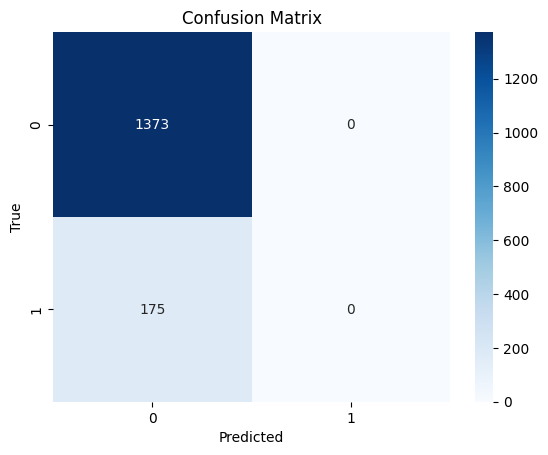

In [19]:
cm = confusion_matrix(y, y_predicted_total)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Same methods but neglecting NAN values

In [20]:
# Dataset loading
input_dataframe = pd.read_csv('credit_card_dataset.csv')

# Data Preprocessing
input_dataframe = input_dataframe.dropna()

# one-hot encoding
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# print(df.head(n=10))
# Features and target splitting
X = input_dataframe.drop(['Ind_ID', 'Rejected'], axis=1)
y = input_dataframe['Rejected'].values.reshape(-1, 1)

# We are writing the standardise method in our code directly
X = (X - X.mean()) / X.std()

# Creating the data matrix by adding a 1's column as the first column
X = np.c_[np.ones((X.shape[0], 1)), X]

# Declaring the weights matrix
weights = np.zeros((X.shape[1], 1))

# Declaring our Logistic function in the name of sigmoid
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# defining our Cost function
def cost_function(X, y, weights):
    mean_term = len(y)
    regression_outputs = sigmoid((X@weights))
    cost = np.mean(np.log(1 + np.exp(regression_outputs)) -y * regression_outputs)
    # cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    #cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Defining our gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    target_size = len(y)
    for i in range(iterations):
        logistic_function_value = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (logistic_function_value - y)) / target_size
        theta -= alpha * gradient
    return theta

# Training our model using the following hardcoded values for alpha and iterations
alpha = 0.01
iterations = 1000
weights = gradient_descent(X, y, weights, alpha, iterations)

# Calculating the target variable
y_predicted = sigmoid(np.dot(X, weights))
y_predicted_total = (y_predicted >= 0.5).astype(int)

# comparing our obtained target variables with actual target variables
model_accuracy = np.mean(y_predicted_total == y)
print(f"Training Accuracy: {model_accuracy}")

Training Accuracy: 0.9024390243902439


In [21]:
for i in range(len(y_predicted_total)):
    if y_predicted_total[i] == True:
        print("Rejected row number identified is ",i)

Rejected row number identified is  42
Rejected row number identified is  270
Rejected row number identified is  312
Rejected row number identified is  313
Rejected row number identified is  636
Rejected row number identified is  637
Rejected row number identified is  642
Rejected row number identified is  724
Rejected row number identified is  779
Rejected row number identified is  842
Rejected row number identified is  845
Rejected row number identified is  1018


In [22]:
# testing k folds function on the modified model
k = 5  
alpha = 0.01
iterations = 1000

average_accuracy = k_fold_cross_validation(X, y, k, alpha, iterations)
print(f"Average Accuracy across {k}-fold Cross-Validation: {average_accuracy}")

Average Accuracy across 5-fold Cross-Validation: 0.8946341463414635


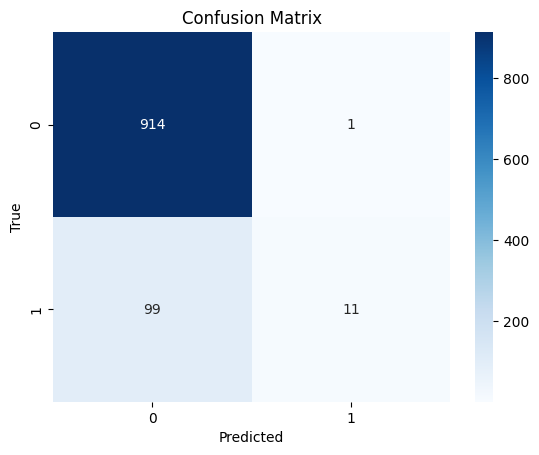

In [23]:
cm = confusion_matrix(y, y_predicted_total)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 4. Feature wise correlation

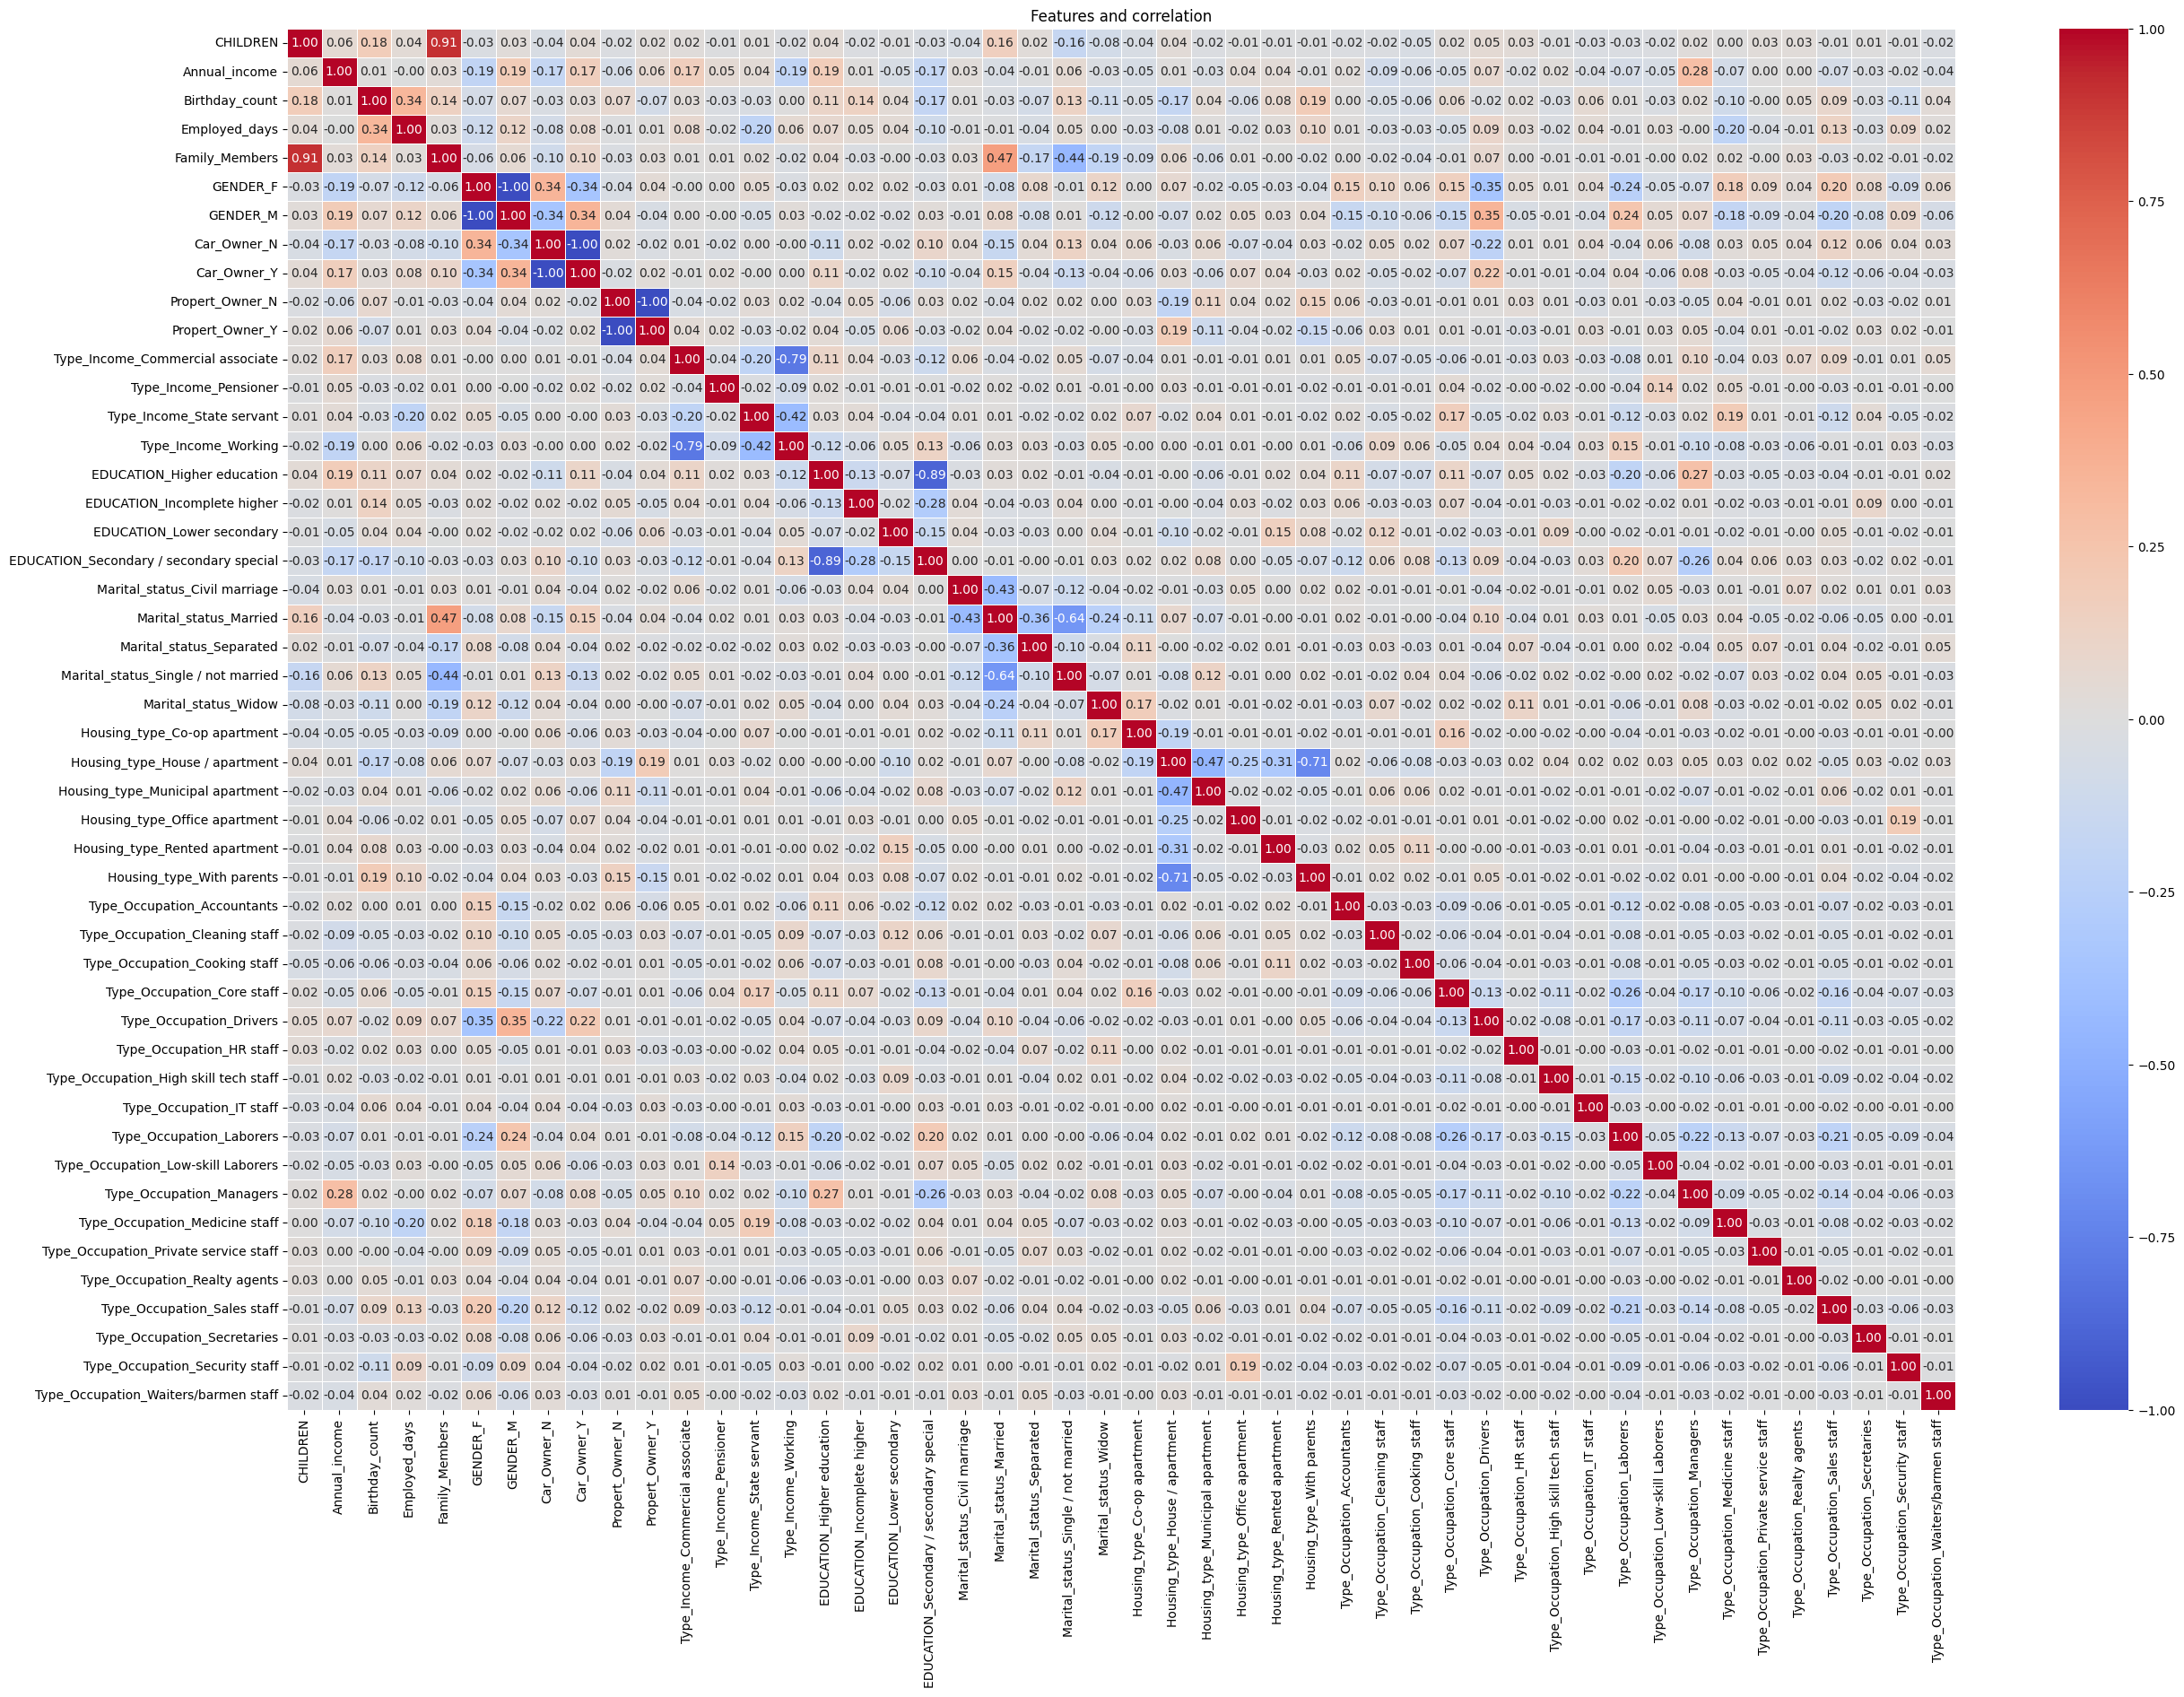

In [24]:

correlation_matrix = input_dataframe.drop(['Ind_ID', 'Rejected'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Features and correlation')
plt.show()

### 5. Feature vs target correlation

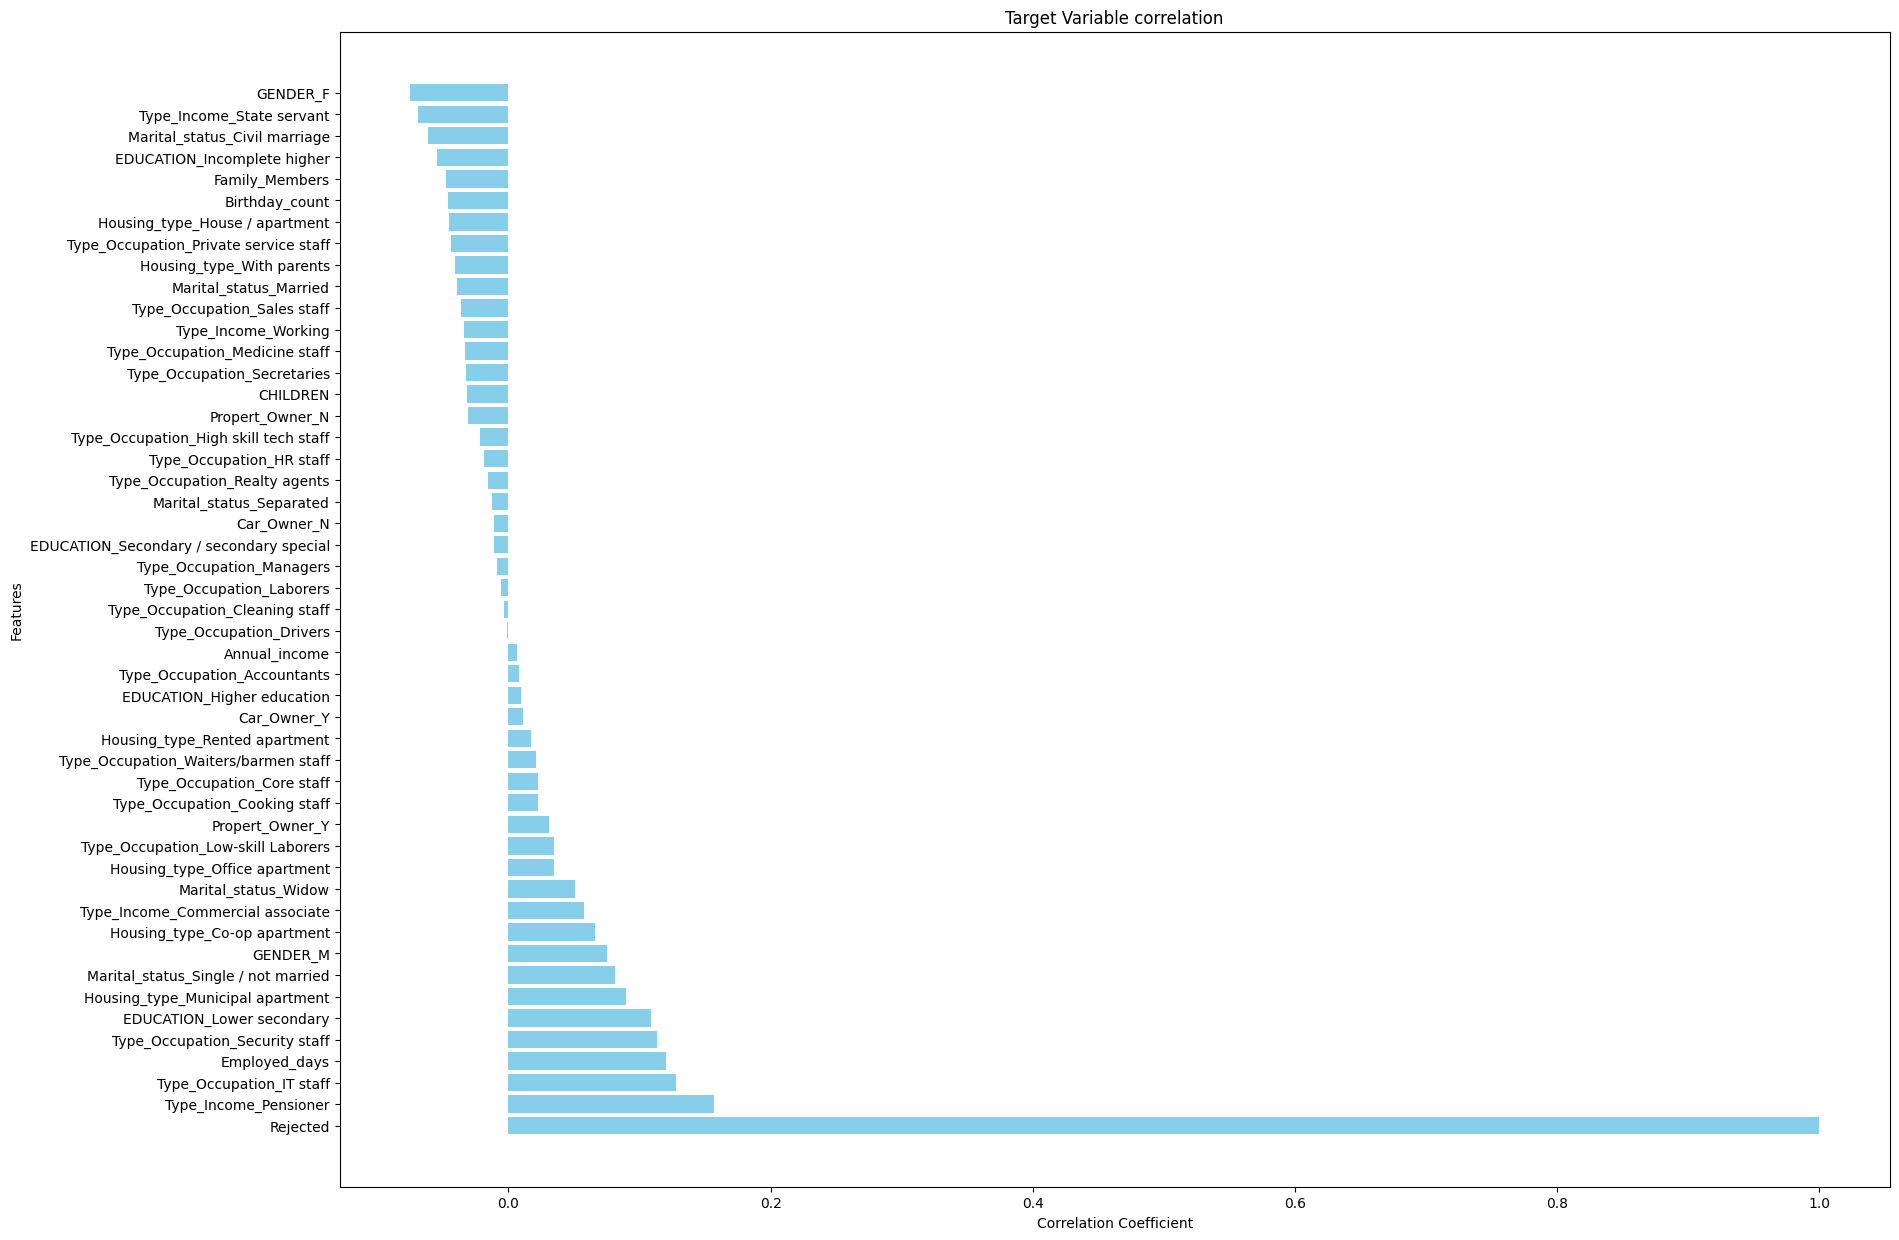

In [25]:
correlation_with_target = input_dataframe.drop(['Ind_ID'], axis=1).corr()['Rejected'].sort_values(ascending=False)
# bar plot
plt.figure(figsize=(20, 15))
plt.barh(correlation_with_target.index, correlation_with_target.values, color='skyblue')
plt.title('Target Variable correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

### 6. Inference
In this approach we found that efficiency has improved in a very least manner. But efficiency is even more if we drop the nan values which is not good because our data is very limited hence dropping na is not a feasible approach.
Also from the correlation and confusion matrices we again conclude that the data is imbalanced and all the features are least correlated with the target.
Positively family size and children are correlated because they account to the family members count

______________________________________________________________________

### Third approach

### 1. One hot encoding 
Using the same one hot encoding we are including age and employed days column

In [26]:
cc_dataset_path = 'credit_card_dataset.csv'
input_dataframe = pd.read_csv(cc_dataset_path)

# one-hot encoding
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# Load age data
days_in_year = 365  # accounting for leap years
age_days = np.abs(input_dataframe['Birthday_count']) // days_in_year
input_dataframe['Birthday_count'] = age_days

# Load employed years data
employed_days = np.where(input_dataframe['Employed_days'] <= 0, np.abs(input_dataframe['Employed_days']) // days_in_year, 0)
input_dataframe['Employed_days'] = employed_days

# Concatenate age and employed features to the DataFrame
# input_dataframe = pd.concat([input_dataframe, age.rename('Age'), employed_days.rename('Employed_years')], axis=1)
# input_dataframe = pd.concat([input_dataframe, age, employed_days], axis=1)

# print(input_dataframe['Employed_days'])
# Drop original columns
# input_dataframe = input_dataframe.drop(['Birthday_count', 'Employed_days'], axis=1)

# Check for and handle non-finite values
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Handling null values using mean
## This line can be either taken or not taken depending upon individual user
input_dataframe.fillna(input_dataframe.mean(), inplace=True)

# Split the data into features (X) and the target variable (y)
X = input_dataframe.drop(['Ind_ID', 'Rejected','CHILDREN'], axis=1)
# X= df['Employed_days']
y = input_dataframe['Rejected'].values.reshape(-1, 1)

# We are writing the standardise method in our code directly
X = (X - X.mean()) / X.std()


# Creating the data matrix by adding a 1's column as the first column
X = np.c_[np.ones((X.shape[0], 1)), X]

# Declaring the weights matrix
weights = np.zeros((X.shape[1], 1))

# Declaring our Logistic function in the name of sigmoid
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# defining our Cost function
def cost_function(X, y, weights):
    mean_term = len(y)
    regression_outputs = sigmoid((X @ weights))
    cost = -np.mean(y * np.log(sigmoid(X @ weights)) + (1 - y) * np.log(1 - sigmoid(X @ weights)))
    # cost = np.mean(np.log(1 + np.exp(regression_outputs)) - y * regression_outputs)
    # mean_term = len(y)
    # regression_outputs = sigmoid((X@weights))
    # cost = np.mean(np.log(1 + np.exp(regression_outputs)) -y * regression_outputs)

    return cost

# Defining our gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

# Training our model using the following hardcoded values for alpha and iterations
alpha = 0.01
iterations = 1000
weights = gradient_descent(X, y, weights, alpha, iterations)

# Calculating the target variable
y_predicted = sigmoid(np.dot(X, weights))
y_predicted_total = (y_predicted >= 0.5).astype(int)

# comparing our obtained target variables with actual target variables
model_accuracy = np.mean(y_predicted_total == y)
print(f"Training Accuracy: {model_accuracy}")

Training Accuracy: 0.8888888888888888


In [27]:
for i in range(len(y_predicted_total)):
    if y_predicted_total[i] == True:
        print("Rejected row number identified is ",i)

Rejected row number identified is  491
Rejected row number identified is  492
Rejected row number identified is  1118
Rejected row number identified is  1291
Rejected row number identified is  1308


In [28]:
# testing k folds function on the modified model
k = 5  
alpha = 0.01
iterations = 1000

average_accuracy = k_fold_cross_validation(X, y, k, alpha, iterations)
print(f"Average Accuracy across {k}-fold Cross-Validation: {average_accuracy}")

Average Accuracy across 5-fold Cross-Validation: 0.8882555590353899


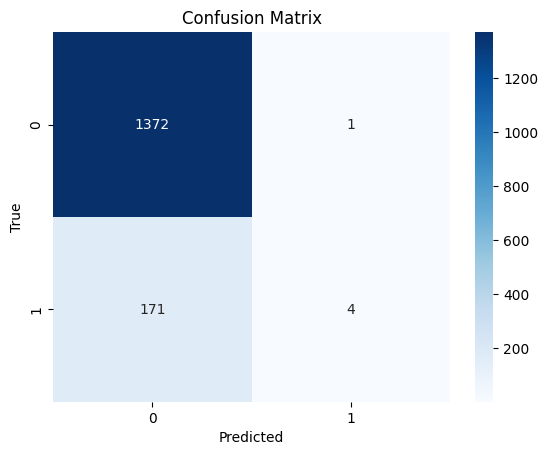

In [29]:
cm = confusion_matrix(y, y_predicted_total)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Other validations

### F1 score

In [30]:
from sklearn.metrics import f1_score

In [31]:
# Calculate F1 score
f1 = f1_score(y, y_predicted_total)

print(f"Training Accuracy: {model_accuracy}")
print(f"F1 Score: {f1}")

Training Accuracy: 0.8888888888888888
F1 Score: 0.04444444444444444


### Fourth approach

As our dataset is unbalanced the upcoming models will deal it even better

### Gradient Boosting and Random forest using scikit learn library

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Spliting our data into training and testing sets
# X and Y are defined from the previous model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Gradient Boosting Classifier
gb_class = GradientBoostingClassifier(random_state=42)
gb_class.fit(X_train, y_train)

# Predicting the target variable on the training type
y_predicted_train_gb = gb_class.predict(X_train)

# Predicting the target variable on the testing type
y_predicted_test_gb = gb_class.predict(X_test)

# Evaluating the  model
print("Gradient Boosting Results:")
print("Training-Accuracy:", accuracy_score(y_train, y_predicted_train_gb))
print("Testing-Accuracy:", accuracy_score(y_test, y_predicted_test_gb))
print("F1 Score:", f1_score(y_test, y_predicted_test_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_test_gb))
print("Classification Report:\n", classification_report(y_test, y_predicted_test_gb))


# Similarly random forest 
# Random Forest Classifier
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train, y_train)

# Predicting the target variable on the training type
y_predicted_train_rf = rf_class.predict(X_train)

# Predicting the target variable on the testing type
y_predicted_test_rf = rf_class.predict(X_test)

# Evaluating the model
print("\nRandom Forest Results:")
print("Training-Accuracy:", accuracy_score(y_train, y_predicted_train_rf))
print("Testing-Accuracy:", accuracy_score(y_test, y_predicted_test_rf))
print("F1 Score:", f1_score(y_test, y_predicted_test_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_test_rf))
print("Classification Report:\n", classification_report(y_test, y_predicted_test_rf))


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Results:
Training-Accuracy: 0.9216478190630049
Testing-Accuracy: 0.9
F1 Score: 0.20512820512820512
Confusion Matrix:
 [[275   1]
 [ 30   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       276
           1       0.80      0.12      0.21        34

    accuracy                           0.90       310
   macro avg       0.85      0.56      0.58       310
weighted avg       0.89      0.90      0.87       310



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Results:
Training-Accuracy: 0.9927302100161551
Testing-Accuracy: 0.9258064516129032
F1 Score: 0.5306122448979592
Confusion Matrix:
 [[274   2]
 [ 21  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       276
           1       0.87      0.38      0.53        34

    accuracy                           0.93       310
   macro avg       0.90      0.69      0.75       310
weighted avg       0.92      0.93      0.91       310



### Inference
Testing accuracy and F1 score has improved significantly after using Random foresh and gradient boosting

### Fifth Approach

### Sampling (down and up sampling)

Importign necessary modules from scikit learn library

In [33]:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [34]:
# dataset loading
cc_dataset_path = 'credit_card_dataset.csv'
input_dataframe = pd.read_csv(cc_dataset_path)

# one-hot encoding
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# Load age data
days_in_year = 365  # accounting for leap years
age_days = np.abs(input_dataframe['Birthday_count']) // days_in_year
input_dataframe['Birthday_count'] = age_days

# Load employed years data
employed_days = np.where(input_dataframe['Employed_days'] <= 0, np.abs(input_dataframe['Employed_days']) // days_in_year, 0)
input_dataframe['Employed_days'] = employed_days

input_dataframe.fillna(input_dataframe.mean(), inplace=True)

# Spliting major targets and minor targets
input_dataframe_majority = input_dataframe[input_dataframe['Rejected'] == 0]
input_dataframe_minority = input_dataframe[input_dataframe['Rejected'] == 1]

# Upsampling -> minority class
minority_upsampled = resample(input_dataframe_minority, replace=True, n_samples=len(input_dataframe_majority), random_state=42)

# we define 2 data now as per the following
# majority class + upsampled minority class
input_upsampled = pd.concat([input_dataframe_majority, minority_upsampled])

# Downsampling -> majority class
majority_downsampled = resample(input_dataframe_majority, replace=False, n_samples=len(input_dataframe_minority), random_state=42)

# downsampled majority class + minority class
input_downsampled = pd.concat([majority_downsampled, input_dataframe_minority])

# Choose either downsampled input or upsampled input based on our interest

# Split the data into features (X) and the target variable (y)
X_upsampled = input_upsampled.drop(['Ind_ID', 'Rejected', 'CHILDREN'], axis=1)
X_downsampled = input_downsampled.drop(['Ind_ID', 'Rejected', 'CHILDREN'], axis=1)
y_upsampled = input_upsampled['Rejected'].values.reshape(-1, 1)
y_downsampled = input_downsampled['Rejected'].values.reshape(-1, 1)

# standardisation
X_upsampled = (X_upsampled - X_upsampled.mean()) / X_upsampled.std()
X_downsampled = (X_downsampled - X_downsampled.mean()) / X_downsampled.std()

# Data matrix
X_upsampled = np.c_[np.ones((X_upsampled.shape[0], 1)), X_upsampled]
X_downsampled = np.c_[np.ones((X_downsampled.shape[0], 1)), X_downsampled]

# weights
weights_upsampled = np.zeros((X_upsampled.shape[1], 1))
weights_downsampled = np.zeros((X_downsampled.shape[1], 1))

# logistic function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# Cost function
def cost_function(X, y, weights):
    mean_term = len(y)
    regression_outputs = sigmoid((X @ weights))
    cost = -np.mean(y * np.log(regression_outputs) + (1 - y) * np.log(1 - regression_outputs))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

# model training -> Upsampled
alpha = 0.01
iterations = 1000
weights_upsampled = gradient_descent(X_upsampled, y_upsampled, weights_upsampled, alpha, iterations)

# model training -> Downsampled
alpha = 0.01
iterations = 1000
weights_downsampled = gradient_descent(X_downsampled, y_downsampled, weights_downsampled, alpha, iterations)

# Predictions on the training set - Upsampled
y_predicted_upsampled = sigmoid(np.dot(X_upsampled, weights_upsampled))

# Predictions on the training set - Downsampled
y_predicted_downsampled = sigmoid(np.dot(X_downsampled, weights_downsampled))

# Evaluate the model on the training set - Upsampled
y_predicted_total_upsampled = (y_predicted_upsampled >= 0.5).astype(int)
accuracy_upsampled = np.mean(y_predicted_total_upsampled == y_upsampled)
print(f"Training Accuracy (Upsampled): {accuracy_upsampled}")

# Evaluate the model on the training set - Downsampled
y_predicted_total_downsampled = (y_predicted_downsampled >= 0.5).astype(int)
accuracy_downsampled = np.mean(y_predicted_total_downsampled == y_downsampled)
print(f"Training Accuracy (Downsampled): {accuracy_downsampled}")


Training Accuracy (Upsampled): 0.6584122359796067
Training Accuracy (Downsampled): 0.5


In [35]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# RandomOverSampler
ros = RandomOverSampler(random_state=42)

# training data transformation transformation
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# predictions
y_pred = clf.predict(X_test)

# Result
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       276
           1       0.88      0.44      0.59        34

    accuracy                           0.93       310
   macro avg       0.91      0.72      0.78       310
weighted avg       0.93      0.93      0.92       310



### Confusion Matrix

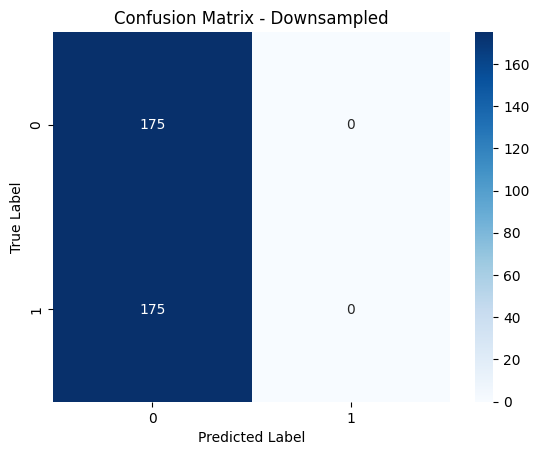

In [36]:
cm_downsampled = confusion_matrix(y_downsampled, y_predicted_total_downsampled)

# Plot the confusion matrix heatmap
sns.heatmap(cm_downsampled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Downsampled')
plt.show()

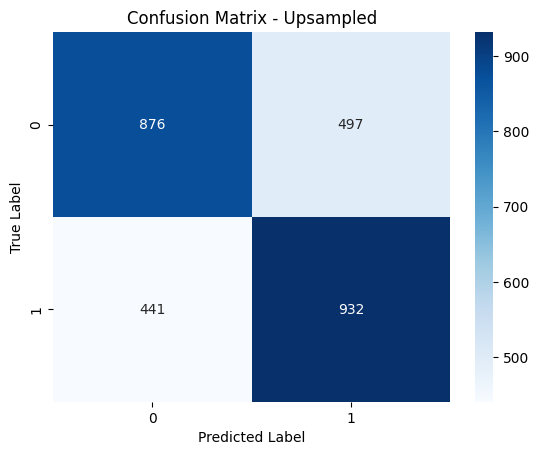

In [37]:
cm_upsampled = confusion_matrix(y_upsampled, y_predicted_total_upsampled)

# Plot the confusion matrix heatmap
sns.heatmap(cm_upsampled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Upsampled')
plt.show()

_____________________________________________________________________

### Sixth approach
### Decision trees and SVM

Importing necessary inbuilt libraries

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [39]:
# dataset loading
input_dataframe = pd.read_csv('credit_card_dataset.csv')

# one - hot encoding
# input_dataframe = input_dataframe.dropna()
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# Load age data
days_in_year = 365  # accounting for leap years
age_days = np.abs(input_dataframe['Birthday_count']) // days_in_year
input_dataframe['Birthday_count'] = age_days

# Load employed years data
employed_days = np.where(input_dataframe['Employed_days'] <= 0, np.abs(input_dataframe['Employed_days']) // days_in_year, 0)
input_dataframe['Employed_days'] = employed_days

# input_dataframe.fillna(input_dataframe.mean(), inplace=True)

# Features and targets
X = input_dataframe.drop(['Ind_ID', 'Rejected'], axis=1)
y = input_dataframe['Rejected']

# Standardisation
X = (X - X.mean()) / X.std()

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree using scikit-learn
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions 
y_predicted_dt = dt_model.predict(X_test)

# accuracy
accuracy_dt = accuracy_score(y_test, y_predicted_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8903225806451613


### SVM

In [40]:
# dataset loading
input_dataframe = pd.read_csv('credit_card_dataset.csv')

# one - hot encoding
# input_dataframe = input_dataframe.dropna()
input_dataframe = pd.get_dummies(input_dataframe, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

# Load age data
days_in_year = 365  # accounting for leap years
age_days = np.abs(input_dataframe['Birthday_count']) // days_in_year
input_dataframe['Birthday_count'] = age_days

# Load employed years data
employed_days = np.where(input_dataframe['Employed_days'] <= 0, np.abs(input_dataframe['Employed_days']) // days_in_year, 0)
input_dataframe['Employed_days'] = employed_days

input_dataframe.fillna(input_dataframe.mean(), inplace=True)

# Features and targets
X = input_dataframe.drop(['Ind_ID', 'Rejected'], axis=1)
y = input_dataframe['Rejected']

# Standardisation
X = (X - X.mean()) / X.std()

# Test - train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM implementation
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Example: Predictions on the testing set
y_predicted_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_predicted_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.8935483870967742


_______________________________________________________________________